Tree-based methods in data science are a popular family of algorithms used for both classification and regression tasks. These methods are intuitive and powerful, often providing high performance with relatively simple models. Let’s break down tree-based methods using analogies and technical details.

# Weak Learners
Weak learners are models that perform slightly better than random guessing.

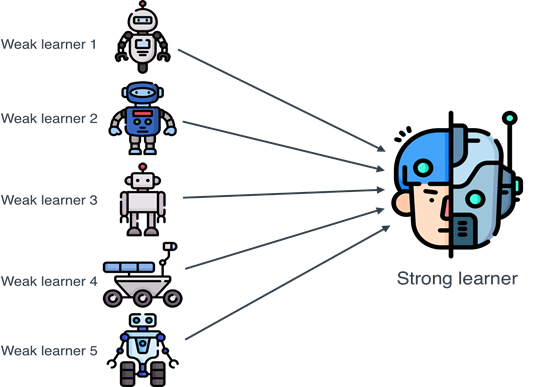
*Source: Mehmet Akturk*

**Ensemble Learning is based on weak learners.**

# Concepts

### 1. Decision Trees
Imagine you're in a forest with many paths. You want to find the path that leads you to a treasure. Each path represents a decision, and at each fork in the path, you make a choice based on certain criteria (like "Is the ground wet?" or "Are there bird sounds?"). This is essentially how a decision tree works.

**Technical Details:**
- **Nodes and Leaves:** Each decision point is called a node. The final outcome (like finding the treasure) is at the leaf.
- **Splitting Criteria:** At each node, the decision tree algorithm selects the best feature and threshold to split the data. Common criteria for splitting include Gini impurity and information gain for classification, and mean squared error for regression.
- **Recursive Partitioning:** The process of splitting is recursive, meaning it repeats at each node until a stopping condition is met (like maximum depth or minimum samples per leaf).

### 2. Random Forest
Imagine instead of following just one path to find the treasure, you have multiple friends, each exploring different paths. At the end, they all come together and vote on the best path based on their individual experiences. This ensemble of paths is akin to a random forest.

**Technical Details:**
- **Multiple Trees:** A random forest "grows" multiple decision trees.
- **Bootstrap Aggregation (Bagging):** Each tree is trained on a random subset of the data (with replacement), a process known as bootstrapping. (RANDOM ROWS)
- **Feature Randomness:** When splitting nodes, each tree considers a random subset of features, adding diversity to the trees. (RANDOM COLUMNS)
- **Voting/Averaging:** For classification, each tree votes for a class, and the majority vote is taken. For regression, the average of all tree predictions is used.

### 3. Gradient Boosting Trees
Now, think of this as a learning process where each friend not only tries different paths but also learns from the mistakes of the previous friend. If one friend finds a wrong path, the next friend tries to correct that mistake. This iterative learning is what gradient boosting does.

**Technical Details:**
- **Sequential Learning:** Trees are built sequentially, with each new tree trying to correct the errors of the previous ones.
- **Residuals:** The errors (residuals) of the current tree are used to train the next tree.
- **Learning Rate:** Controls the contribution of each tree. A smaller learning rate requires more trees but can improve model performance.
- **Loss Function:** The model minimizes a loss function (like mean squared error for regression or log loss for classification) through gradient descent.


### Key Concepts to Understand

1. **Entropy and Information Gain (for Decision Trees):** Measures used to decide how to split data. Information gain calculates the reduction in entropy (uncertainty) from a split.
2. **Bias-Variance Tradeoff:** Random forests and gradient boosting help balance bias (error from incorrect assumptions) and variance (error from sensitivity to small fluctuations in training data).
3. **Overfitting:** Trees can become too complex, fitting the training data perfectly but performing poorly on unseen data. Techniques like pruning (removing parts of the tree) and limiting tree depth are used to combat this.


# Visual Explanations

### 1. Decision Trees

#### Visual Explanation
Imagine we have a dataset with features and labels, like a simple dataset of fruits. Each fruit has features like shape and weight, and labels like "Orange" or "Mandarin".

1. **Decision Tree Structure:**

   ```
           [Shape]
          /       \
      Circular    Oval
       /            \
    Orange         [Weight]
                   /     \
               Light    Heavy
                /          \
             Mandarin       Orange
   ```

   The decision tree asks questions about the features at each node (Shape, Weight) to classify the fruit.


Let's use `scikit-learn` to create and visualize a decision tree.

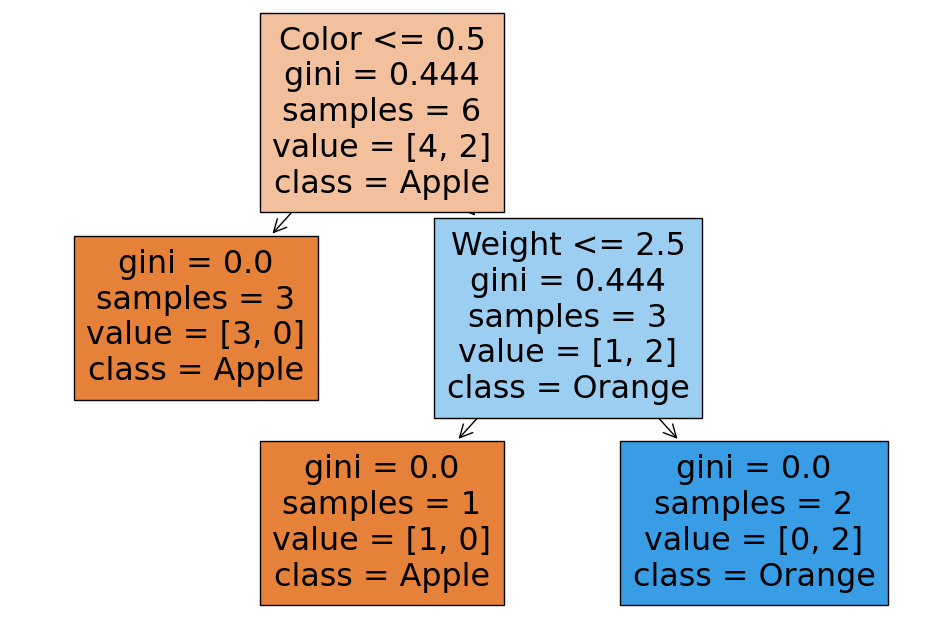

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Sample dataset
data = {'Color': ['Green', 'Red', 'Red', 'Green', 'Green', 'Red'],
        'Weight': [4, 2, 3, 1, 2, 3],
        'Label': ['Apple', 'Apple', 'Orange', 'Apple', 'Apple', 'Orange']}
df = pd.DataFrame(data)

# Convert categorical data to numerical
df['Color'] = df['Color'].map({'Green': 0, 'Red': 1})
X = df[['Color', 'Weight']] # training features/independent variables
y = df['Label'] # target/dependent variable

# Train decision tree classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['Color', 'Weight'], class_names=['Apple', 'Orange'], filled=True)
plt.show()

### 2. Random Forests

#### Visual Explanation
Random Forests combine multiple decision trees to improve the overall performance and robustness.

1. **Random Forest Structure:**
   Each tree in the forest is built on a random subset of the data and features.

   ```
      Tree 1:                  Tree 2:                 Tree 3:
           [Color]                 [Weight]                [Color]
          /       \               /        \              /       \
      Green       Red           Light    Heavy          Green      Red
       /            \            /          \            /          \
    Apple         [Weight]   Apple       Orange       [Weight]    Orange
                   /     \                                  /  \
               Light    Heavy                            Light Heavy
                /          \                             Apple  Orange
             Apple       Orange
   ```


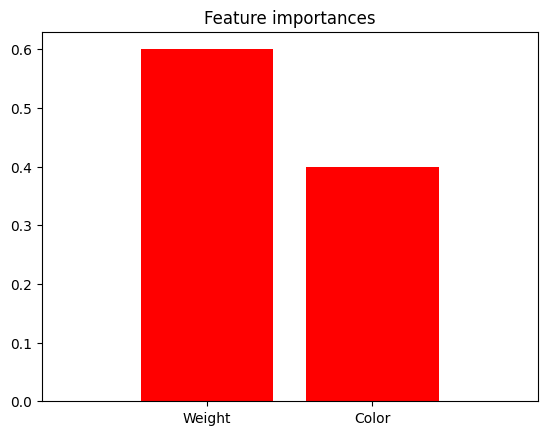

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest classifier
clf = RandomForestClassifier(n_estimators=10)  # 10 trees
clf = clf.fit(X, y)

# Feature importance (in terms of contribution to the prediction)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = ['Color', 'Weight']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

### 3. Gradient Boosting Trees

#### Visual Explanation
Gradient Boosting Trees build trees sequentially, each new tree correcting errors made by the previous ones.

1. **Gradient Boosting Structure:**
   Each tree focuses on the residual errors of the previous trees.

   ```
      Tree 1:             Tree 2: Residuals       Tree 3: Residuals
           [Color]                 [Weight]                [Weight]
          /       \               /        \              /        \
      Green       Red           Light    Heavy          Light     Heavy
       /            \            /          \            /          \
    Apple         [Weight]   Apple       Orange       [Weight]       Orange
                   /     \                                  /  \
               Light    Heavy                            Light Heavy
                /          \                             Apple  Orange
             Apple       Orange
   ```

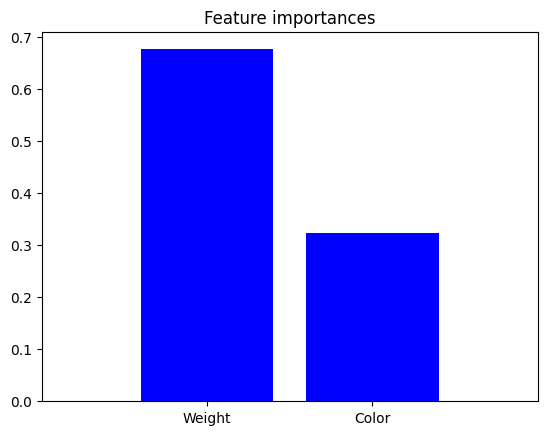

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train gradient boosting classifier
clf = GradientBoostingClassifier(n_estimators=10)  # up to 10 trees
clf = clf.fit(X, y)

# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = ['Color', 'Weight']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
help(clf)

### Gini Coefficient: Detailed Explanation

The Gini coefficient is a measure of impurity used by the CART (Classification and Regression Trees) algorithm to create decision trees. It is used to evaluate splits in the data, helping to determine the best feature and threshold to use at each node of the tree.

#### Intuitive Explanation

Imagine you have a basket of different fruits: apples, oranges, and bananas. If you randomly pick a fruit, the probability of correctly guessing the type of fruit you picked would depend on how mixed the fruits are. If the basket is full of just one type of fruit, your guess will almost always be correct, implying low impurity. Conversely, if the basket contains an equal mix of all fruit types, your guess will often be wrong, implying high impurity.

#### Technical Details

- **Definition:** The Gini coefficient (or Gini index) is a measure of impurity or diversity in a dataset.
- **Formula:** For a dataset with $k$ classes, the Gini coefficient is defined as:

$Gini = 1 - \sum_{i=1}^{k} p_i^2$

where $p_i$ is the proportion of samples belonging to class $i$.

- **Range:** The Gini coefficient ranges from 0 (perfect purity) to 0.5 (maximum impurity for a binary classification). A lower Gini coefficient indicates a purer node.

### Gini Coefficient Calculation: Example

Consider a binary classification problem with the following distribution of classes:

- Node 1: 10 samples of class 0, 5 samples of class 1

For Node 1:
- Proportion of class 0 $p_0$ = 10 / 15 = 0.67
- Proportion of class 1 $p_1$ = 5 / 15 = 0.33

Gini coefficient for Node 1:
$Gini = 1 - (0.67^2 + 0.33^2) = 1 - (0.4489 + 0.1089) = 1 - 0.5578 = 0.4422$

### Python Code to Calculate Gini Coefficient

Let's implement this in Python.

In [ ]:
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))

    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Example dataset
dataset = [
    [2.771244718, 1.784783929, 0],
    [1.728571309, 1.169761413, 0],
    [3.678319846, 2.81281357, 0],
    [3.961043357, 2.61995032, 0],
    [2.999208922, 2.209014212, 0],
    [7.497545867, 3.162953546, 1],
    [9.00220326, 3.339047188, 1],
    [7.444542326, 0.476683375, 1],
    [10.12493903, 3.234550982, 1],
    [6.642287351, 3.319983761, 1]
]

# Split dataset into groups based on a condition (e.g., X1 < 5)
split_value = 5
left_group = [row for row in dataset if row[0] < split_value]
right_group = [row for row in dataset if row[0] >= split_value]

# List of class values (e.g., 0 and 1)
classes = [0, 1]

# Calculate Gini index for the split
gini = gini_index([left_group, right_group], classes)
print(f'Gini Index: {gini:.4f}')

Gini Index: 0.0000


### Explanation of the Code

1. **Function Definition:**
   - `gini_index(groups, classes)` calculates the Gini coefficient for given groups and class values.
   - `groups` is a list of two groups resulting from a split.
   - `classes` is the list of unique class labels.

2. **Counting Instances:**
   - `n_instances` is the total number of samples in both groups combined.

3. **Gini Calculation:**
   - For each group, the Gini index is calculated based on the proportion of each class within the group.
   - The score for each group is weighted by the size of the group relative to the total number of samples.

4. **Example Usage:**
   - A sample dataset is split into two groups based on a feature value.
   - The Gini coefficient is calculated for this split, helping to evaluate its impurity.


## Bagging: BaggingClassifier
A Bagging Classifier is an ensemble learning method that combines the predictions from multiple base classifiers to improve overall performance and reduce overfitting. Bagging stands for "Bootstrap Aggregating," and the idea behind it is to train each base classifier on a different bootstrap sample of the training data.

### Theory: Let's understand the terms!

* **Base Classifier or Weak Learner**:
The base classifier is the individual model used as a building block within the ensemble. Each base model is independently trained. It can be any machine learning algorithm capable of making predictions, such as decision trees, support vector machines, or neural networks. Think about the weak learners in the earlier image!

* **Bootstrap Sampling**:
This involves creating multiple subsets of the training data through bootstrap sampling. Bootstrap sampling is a random sampling technique with replacement, meaning that each sample in the subset can appear more than once, while others may not appear at all.
 * Sampling with Replacement: When creating a bootstrap sample, each instance from the original training dataset has the chance to be included more than once or not at all in the new sample. This means that some instances may appear multiple times, while others may be left out.
 * Same Size as Original Dataset: The size of the bootstrap sample is typically the same as the size of the original dataset. In practice, this means that the new sample will contain some instances from the original dataset multiple times and may not include others.

```
Original training dataset: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Bootstrap Sample 1: [2, 3, 3, 5, 6, 1, 8, 10, 9, 1]

Bootstrap Sample 2: [1, 1, 5, 6, 3, 8, 9, 10, 2, 7]

Bootstrap Sample 3: [1, 5, 8, 9, 2, 10, 9, 7, 5, 4]
```



* **Base Model Training**:
Each base classifier is trained on a different bootstrap sample of the training data. This introduces diversity among the base models, as they are exposed to slightly different versions of the dataset. To make this computationally efficient and less time-consuming, the base models can be trained in parallel.

* **Voting or Averaging**: During the prediction phase, each base classifier makes individual predictions. The final prediction of the Bagging Classifier is typically determined by aggregating these individual predictions. (For classification tasks, a majority voting scheme is commonly used, while for regression tasks, predictions may be averaged.)

Random Forest is a widely used Bagging Classifier, where the base classifiers are decision trees. Random Forest introduces additional randomness by considering only a subset of features (input columns) at each split in the decision tree construction.


### Code: A small example

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load breast cancer dataset
df = load_breast_cancer()
X, y = df.data, df.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_model_dt = DecisionTreeClassifier(random_state=42)

# Define and train Bagging Classifier with Decision Trees
bagging_model_dt = BaggingClassifier(base_model_dt, n_estimators=10, random_state=42)
bagging_model_dt.fit(X_train, y_train)
predictions_bagging_dt = bagging_model_dt.predict(X_test)
accuracy_bagging_dt = accuracy_score(y_test, predictions_bagging_dt)
print(f'Accuracy of Bagging with Decision Trees: {accuracy_bagging_dt:.4f}')

Accuracy of Bagging with Decision Trees: 0.9561


## Boosting: AdaBoost
Adaboost, short for Adaptive Boosting, is, again, an ensemble learning method that combines the predictions of multiple weak learners to create a strong learner. The key idea behind Adaboost is to focus on the misclassified instances during training, assigning them higher weights in subsequent iterations. This adaptive weight assignment allows Adaboost to give more attention to difficult-to-classify examples, ultimately improving the overall model performance.


### Theory: Let's learn the terms first

* **Base Model**: Adaboost starts with a base model - a weak learner, which is a model that performs slightly better than random guessing. Common examples of weak learners include shallow decision trees (stumps) or models with low complexity. The choice of a weak learner depends on the problem at hand, but it's ***essential that the weak learner performs better than random chance.***

* **Weighted Training**: Each instance in the training set is initially assigned equal weights. In each iteration, a weak learner is trained on the current training set. Instances that are misclassified by the model receive higher weights. Subsequent weak learners focus more on the misclassified instances, adjusting the model's attention to the most challenging examples.

* **Weighted Voting:** After training a weak learner, its weight is determined based on its accuracy. More accurate models receive higher weights in the final ensemble.
The weight of each weak learner influences their contribution to the final prediction during testing.

* **Adaptive Learning Rate**: Adaboost introduces an adaptive learning rate that controls the contribution of each weak learner. The learning rate ensures that the ensemble doesn't become overly complex. A lower learning rate may prevent overfitting, but it requires more iterations to converge.

* **Boosted Prediction**: The final prediction is made by combining the predictions of all weak learners, weighted by their individual accuracies and learning rates. For binary classification, a simple majority vote is often used. For multiclass problems, a weighted vote is applied.

### Code: A small example

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

# Step 1: Load the MNIST dataset using Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img1 = X_train[0]
img1.reshape(img1.shape[0], -1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

# Step 1: Load the MNIST dataset using Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the 2D images into 1D arrays to allow model to take them as input
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Step 2: Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Step 3: Define the base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)  # Using a shallow decision tree as a weak learner

# Step 4: Define the AdaBoostClassifier with the base model
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Step 5: Train the AdaBoostClassifier on the training data
adaboost_model.fit(X_train, y_train)

# Step 6: Make predictions on the validation data
predictions = adaboost_model.predict(X_val)

# Step 7: Evaluate the performance of the ensemble on validation data
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy of AdaBoost on MNIST (Validation): {accuracy:.4f}')

# Step 8: Make predictions on the test data
predictions_test = adaboost_model.predict(X_test_flat)

# Step 9: Evaluate the performance of the ensemble on test data
accuracy_test = accuracy_score(y_test, predictions_test)
print(f'Accuracy of AdaBoost on MNIST (Test): {accuracy_test:.4f}')

Accuracy of AdaBoost on MNIST (Validation): 0.7309
Accuracy of AdaBoost on MNIST (Test): 0.7282
